In [15]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display
from pathlib import Path
from warnings import simplefilter
simplefilter('ignore')

In [16]:
# matplotlib defaults
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout = True)
plt.rc('axes', labelsize = 10, labelweight = 'bold', titlesize = 10, titleweight = 'bold', titlepad = 10)

In [17]:
# matplotlib configuration for higher imaginary images
%matplotlib inline
%config InlineBackend.figure_formats = 'retina'

In [18]:
# load the dataset
data_dir = Path('../input/dl-course-data/')
ion = pd.read_csv(data_dir / "ion.csv", index_col = 0)
ion.head()

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

In [19]:
ion.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [20]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

In [21]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [22]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=1, # hide the output because we have so many epochs
)

Epoch 1/1000
1/1 [==============================] - 1s 915ms/step - loss: 0.7105 - binary_accuracy: 0.4024 - val_loss: 0.7416 - val_binary_accuracy: 0.2476
Epoch 2/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7060 - binary_accuracy: 0.4024 - val_loss: 0.7349 - val_binary_accuracy: 0.2476
Epoch 3/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7018 - binary_accuracy: 0.4024 - val_loss: 0.7290 - val_binary_accuracy: 0.2381
Epoch 4/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.6981 - binary_accuracy: 0.4024 - val_loss: 0.7238 - val_binary_accuracy: 0.2381
Epoch 5/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.6949 - binary_accuracy: 0.3984 - val_loss: 0.7191 - val_binary_accuracy: 0.2381
Epoch 6/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6924 - binary_accuracy: 0.3943 - val_loss: 0.7148 - val_binary_accuracy: 0.2381
Epoch 7/1000
1/1 [==============================] - 0s 33ms/step - lo

Best Validation loss: 0.3222 
Best Validation Accuracy: 0.8952


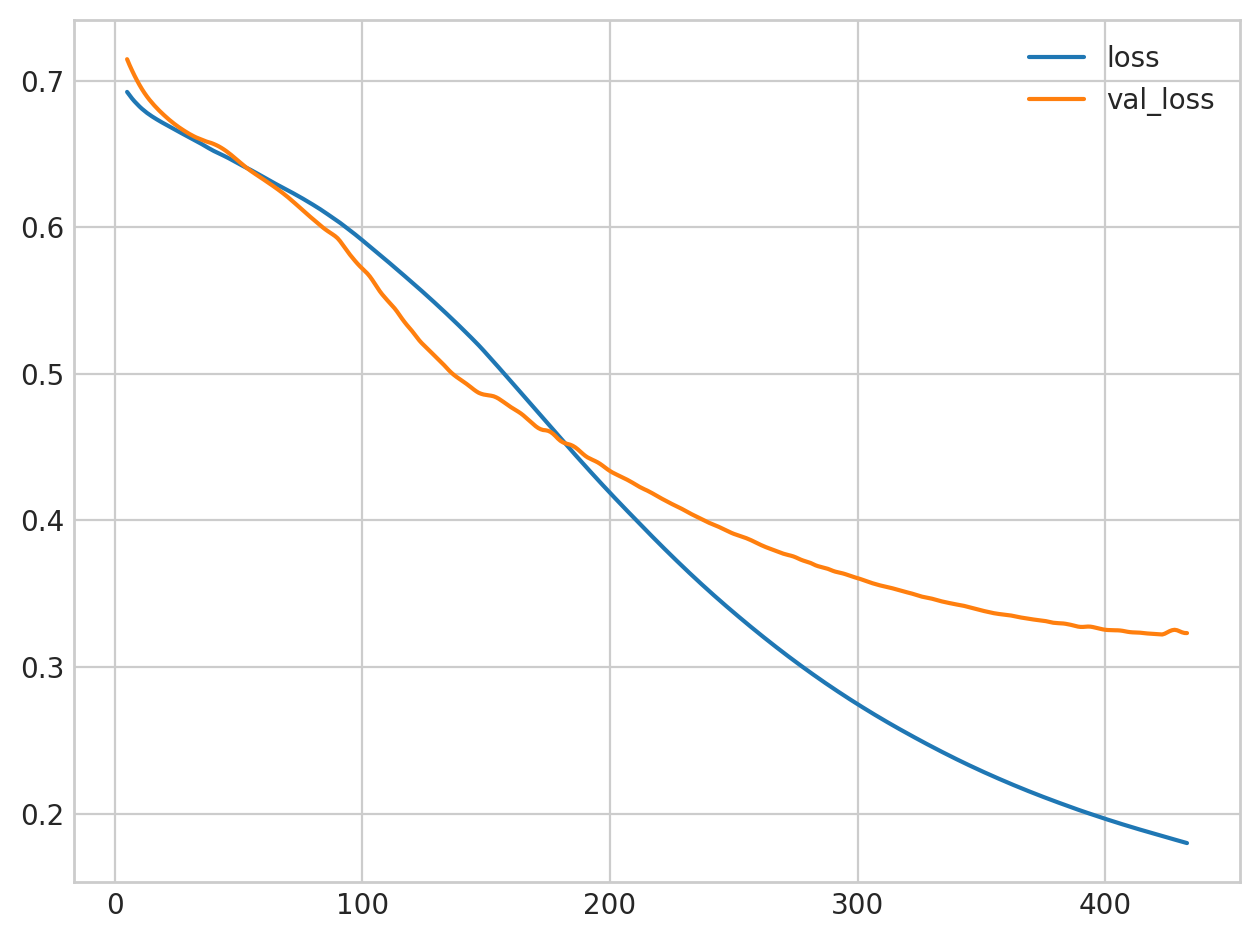

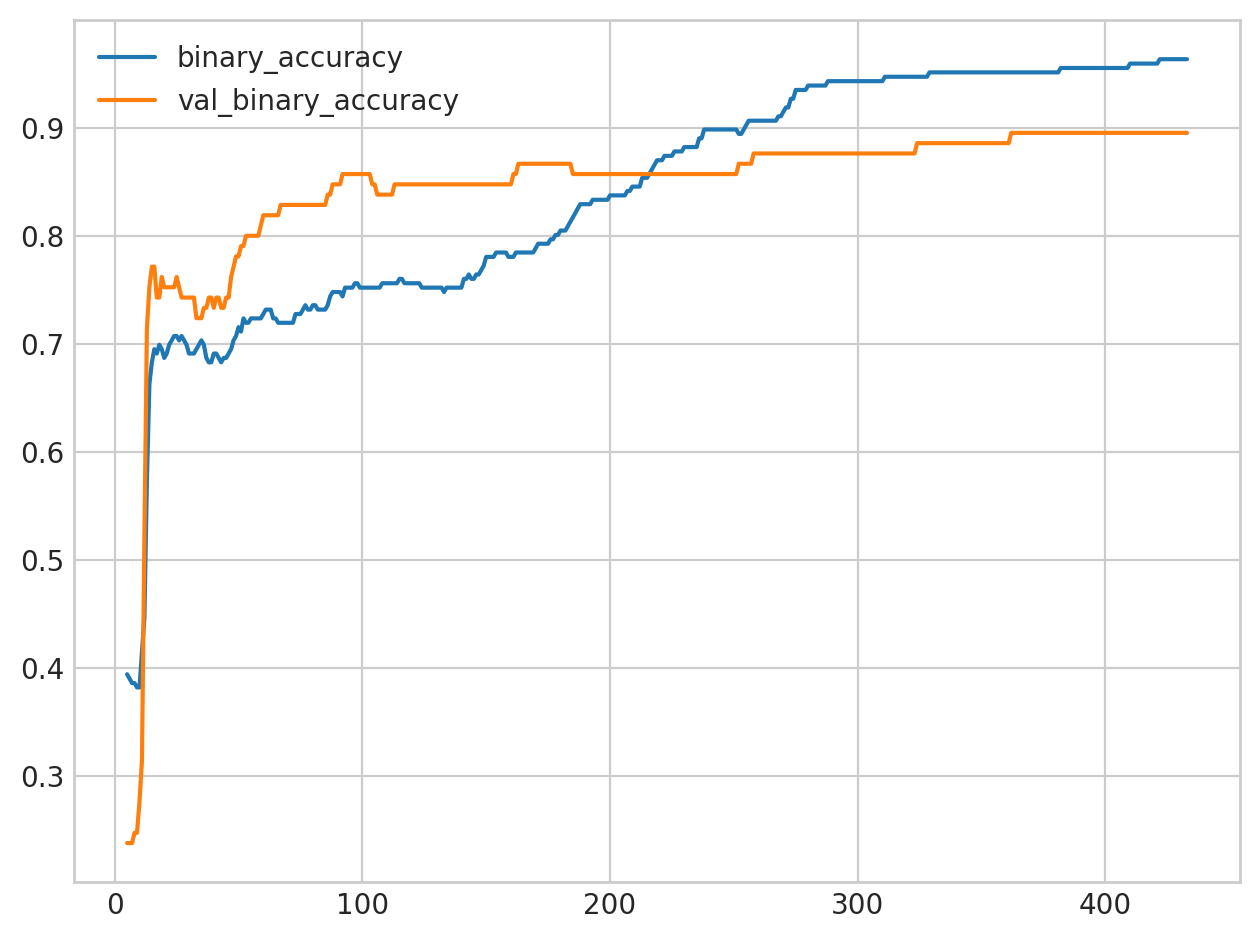

In [23]:
history_df = pd.DataFrame(history.history)
#start the plot at epoch 5
history_df.loc[5:,['loss','val_loss']].plot()
history_df.loc[5:,['binary_accuracy','val_binary_accuracy']].plot()

print(f"Best Validation loss: {history_df['val_loss'].min():0.4f}" +\
      f" \nBest Validation Accuracy: {history_df['val_binary_accuracy'].max():.4f}")